In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
# The below code is commented out because they should be run only once
# after being generated by preprocess_data.R file. 
# ! cat zeisel_2015_pc_eneurons.csv | tr "," "." | tr ";" "," > temp
# ! mv temp zeisel_2015_pc_eneurons.csv 
# ! cat zeisel_2015_logcpm_eneurons.csv | tr "," "." | tr ";" "," > temp
# ! mv temp zeisel_2015_logcpm_eneurons.csv
# ! cat zeisel_2015_clean_anno_eneurons.csv | tr "," "." | tr ";" "," > temp
# ! mv temp zeisel_2015_clean_anno_eneurons.csv

In [6]:
zeisel_pc = pd.read_csv('zeisel_2015_pc_eneurons.csv')
zeisel_logcpm = pd.read_csv('zeisel_2015_logcpm_eneurons.csv', index_col=0)
zeisel_anno = pd.read_csv('zeisel_2015_clean_anno_eneurons.csv')

### K-means clustering

In [29]:
# K-means clustering
n_clusters = 12
X = np.array(zeisel_pc.iloc[:, 1:]) # Get the data part for K-means clustering.
X[np.isnan(X)] = 0
k_means = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++').fit(X)


/home/kramasamy90/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


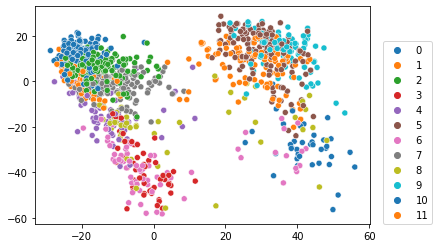

In [30]:
# Plot over PC1-PC2 axes.
x = np.array(zeisel_pc["PC1"])
y = np.array(zeisel_pc["PC2"])

sns.scatterplot(x = x, y = y, hue=k_means.labels_, legend="full", palette="tab10")
plt.legend(loc = (1.04, 0))
plt.show()

In [21]:
# Get tSNE coordinates.
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X)
x = X_tsne[:, 0]
y = X_tsne[:, 1]

/tmp/ipykernel_2241/1912766196.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


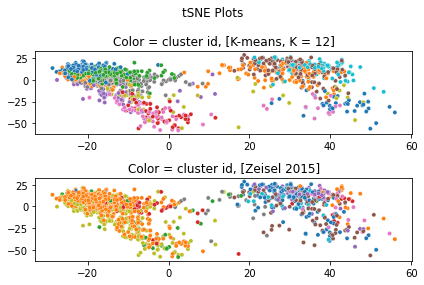

In [31]:
fig, axes = plt.subplots(2, 1)

fig.suptitle('tSNE Plots')
# sns.scatterplot(ax = axes[0], x = x, y = y, hue = k_means.labels_, legend = "full", palette = "tab10", size=0.5)
sns.scatterplot(ax = axes[0], x = x, y = y, hue = k_means.labels_, palette = "tab10", size=0.5, legend = False)
# axes[0].legend(loc = (1.04, 0))
axes[0].set_title('Color = cluster id, [K-means, K = ' + str(n_clusters) +']')

# sns.scatterplot(ax = axes[1], x = x, y = y, hue = zeisel_anno['level2class'], legend = "full", palette = "tab10", size = 0.5)
sns.scatterplot(ax = axes[1], x = x, y = y, hue = zeisel_anno['level2class'], palette = "tab10", size = 0.5, legend = False)
# axes[1].legend(loc = (1.04, 0))
axes[1].set_title('Color = cluster id, [Zeisel 2015]')

fig.tight_layout()
# fig.savefig('pic.pdf')
fig.show()

### Soft K-means clustering

In [18]:
from sklearn.mixture import GaussianMixture as gmm

soft_k_means = gmm(n_components=n_clusters).fit(X)

In [19]:
k_prob = soft_k_means.predict_proba(X)
k_prob.shape
k_prob[:, 0]

array([3.25626811e-43, 1.04535902e-51, 8.26892957e-43, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2241/3805714299.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


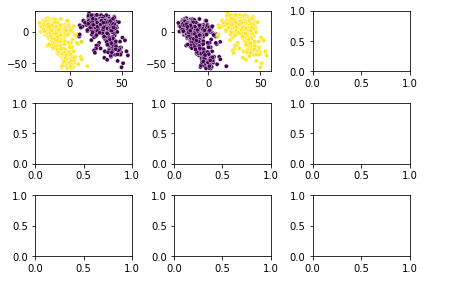

In [14]:
fig, axes = plt.subplots(3, 3)
for i in range(n_clusters):
    sns.scatterplot(ax = axes[i // 3][i % 3], x=x, y=y, c=k_prob[:, i], cmap = "viridis", size = 0.2, legend=False)
fig.legend(loc = (1.04, 0))
fig.tight_layout()
# fig.savefig('pic2.pdf')
fig.show()

### Plot marker gene expressions [Incomplete]

In [ ]:
# Marker genes:
marger_genes = ['Rbfox3', '']

(3005,)

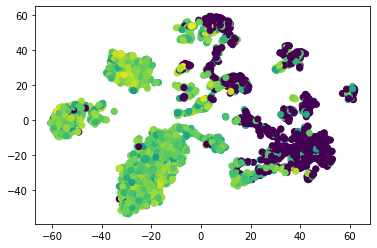

In [80]:
color = zeisel_logcpm.iloc[2351, :] # Rbfox3 is Row number 2351
plt.scatter(x, y, c = color, cmap = 'viridis')

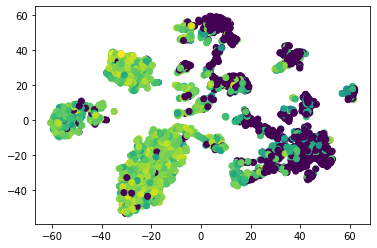

In [83]:
color = zeisel_logcpm.iloc[1849, :] # Dlg4 aka PSD95.
plt.scatter(x, y, c = color, cmap = 'viridis')

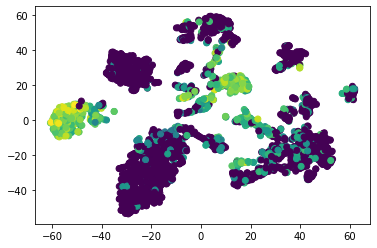

In [86]:
color = zeisel_logcpm.iloc[659, :] # 659 is Slc6a1 aka GAT1
plt.scatter(x, y, c = color, cmap = 'viridis')